# Atomic hamiltonian

In [193]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

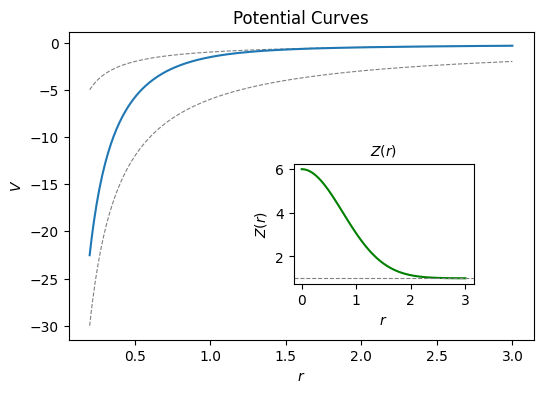

In [194]:
# Define parameters
Z0 = 6    # Adjustable Z_0
s = 0.75   # Adjustable s

# Define range for r
r = np.linspace(0.2, 3, 300)
r1 = np.linspace(0, 3, 100)

# Define functions
V_1_over_r = -1 / r
V_Z0_over_r = -Z0 / r
_Z_r = lambda r: 1 + (Z0 - 1) * np.exp(-r**2 / (2 * s**2))
def electric_field(r):
    return _Z_r(r) / r**2

def _potential(r):
    return -quad(electric_field, r, np.inf)[0]

potential = np.vectorize(_potential)

Z_r = _Z_r(r1)
V_Z_r_over_r = -_Z_r(r) / r
V_CF = potential(r)


# Create figure and main axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the potential curves
kw_dashed = dict(linestyle='--', color='gray', linewidth=0.8)
ax.plot(r, V_1_over_r, **kw_dashed)
ax.plot(r, V_Z0_over_r, **kw_dashed)
ax.plot(r, V_CF)

# Labels and formatting
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$V$')
ax.set_title(r'Potential Curves')

# Inset plot for Z(r)
ax_inset = fig.add_axes([0.5, 0.25, 0.3, 0.3])  # [left, bottom, width, height] in figure coordinates
ax_inset.plot(r1, Z_r, 'g-', label=r'$Z(r)$')
ax_inset.axhline(1, color='gray', linestyle='--', linewidth=0.8)  # Reference line at Z(r) = 1
ax_inset.set_xlabel(r'$r$', fontsize=10)
ax_inset.set_ylabel(r'$Z(r)$', fontsize=10)
ax_inset.set_title(r'$Z(r)$', fontsize=10)

# Show the figure
plt.show()


Text(3.5, -2.5, 'Sodium')

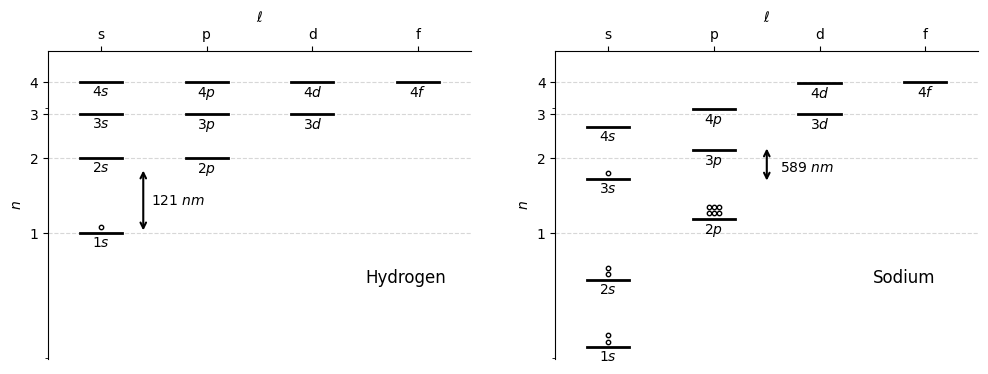

In [196]:

l_labels = ["s", "p", "d", "f", "g"]

def plot_energy_levels(ax, n_levels, E_levels, N_electrons=1):
    # Define energy levels as E = -1/n^2 (in arbitrary units)
    # E_levels = {-n: -1/n**2 for n in n_levels}
    E_H_levels = lambda n: -1/n**2

    # Define the horizontal spacing for different orbitals
    # Create figure and axis
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    
    # Plot energy levels
    levels = []
    for n in n_levels:
        for lx in range(n):
            l = l_labels[lx]
            x = lx + 1
            energy = E_levels(n, l)
            ax.plot([x - 0.2, x + 0.2], [energy, energy], 'k-', lw=2)
            ax.text(x, energy * 1.05, f"${n}{l}$", ha='center', va='top')
            levels.append((energy, (n, lx, x)))
    levels.sort(key=lambda x: x[0])
    
    # Fill orbitals
    orbitals = []
    for energy, (n, lx, x) in levels:
        ne = int(2 * lx + 1)
        d = 0.05
        xx = np.arange(ne) * d + x - d * (ne - 1) / 2
        for x in xx:
            for y in energy * 0.9, energy * 0.8:
                orbitals.append((x, y))
    
    orbitals = orbitals[:N_electrons]
    for orbital in orbitals:
        ax.scatter(*orbital, s=10, edgecolor='k', facecolor='w')

    ylim_max = -0.035
    
    Nl = len(n_levels)

    # Labels and formatting
    ax.xaxis.set_label_position('top')
    ax.set_yscale("symlog", linthresh=0.001)
    ax.set_xlabel(r"$\ell$")
    ax.set_ylabel(r"$n$")
    ax.set_xticks(list(range(1, Nl + 1)))
    ax.set_xticklabels(l_labels[:Nl])
    ax.set_yticks([E_H_levels(n) for n in n_levels])
    ax.set_yticklabels(n_levels, minor=False)
    ax.spines[['right', 'bottom']].set_visible(False)

    # Adjust limits
    ax.set_xlim(0.5, 4.5)
    ax.set_ylim(-10.1, ylim_max)
    ax.grid(axis='y', linestyle='--', alpha=0.5)



n_levels = [1, 2, 3, 4]  # Principal quantum number (n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# hydrogen
E_levels = lambda n, l: -1/n**2
plot_energy_levels(ax1, n_levels, E_levels, N_electrons=1)


# sodium
delta_l = {"s": 1.35, "p": 0.86, "d": 0.01, "f": 0, "g": 0}  # quantum defect
E_levels = lambda n, l: -1/(n - delta_l[l])**2
plot_energy_levels(ax2, n_levels, E_levels, N_electrons=11)


# # Energy scale annotation
xx = 1.4
ax1.annotate("", xy=(xx, -0.3), xytext=(xx, -1),
            arrowprops=dict(arrowstyle='<->', lw=1.5))
ax1.text(xx*1.05, -0.55, r"$121~nm$", va='center')

xx = 2.5
ax2.annotate("", xy=(xx, -0.2), xytext=(xx, -0.4),
            arrowprops=dict(arrowstyle='<->', lw=1.5))
ax2.text(xx*1.05, -0.3, r"$589~nm$", va='center')

xt = (3.5, -2.5)
ax1.text(*xt, "Hydrogen", fontsize=12)
ax2.text(*xt, "Sodium", fontsize=12)

    
    

In [84]:
E_levels(1, "s")

-8.163265306122444